In [3]:
### call libraries and read the dataset
import numpy as np
import pandas as pd
card_segmentation = pd.read_csv('https://www.dropbox.com/scl/fi/2gf6lp6m2v50wx5kp44ud/BankChurners.csv?rlkey=it6hr7qok8yxced9l93zyi6z5&dl=1')

In [4]:
card_segmentation.shape

(10127, 23)

In [5]:
# Calculate population statistics
population_mean = card_segmentation['Customer_Age'].mean()
population_std = card_segmentation['Customer_Age'].std()


# Initialize lists to store results
results = []

# Sample size
sample_size = 400

# Loop over the range of k values
for k in range(50, 5000, 50):
    sample_means = []
    sample_stddevs = []
    
    # Generate and analyze random samples
    for _ in range(k):
        # Extract a random sample of size sample_size
        sample = card_segmentation['Customer_Age'].sample(n=sample_size, replace=True)  # Use replace=False if you don't want replacement
        # Calculate the mean and standard deviation for the sample
        mean = round(sample.mean(), 2)
        stddev = round(sample.std(), 2)
        # Append the results to the lists
        sample_means.append(mean)
        sample_stddevs.append(stddev)

    # Calculate the differences
    mean_difference = round(population_mean - (sum(sample_means) / len(sample_means)), 2)
    stddev_difference = round(population_std - (sum(sample_stddevs) / len(sample_stddevs)), 2)

    # Store the results in the list
    results.append({'k': k, 'mean_difference': mean_difference, 'stddev_difference': stddev_difference})

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

In [6]:
results_df.head(20)

,k,mean_difference,stddev_difference
0,50,-0.03,0.00
1,100,0.05,0.01
2,150,0.02,0.03
3,200,0.03,0.01
4,250,-0.01,0.01
5,300,-0.01,-0.02
6,350,-0.01,0.01
7,400,-0.02,0.01
8,450,0.03,0.01
9,500,0.01,0.00


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

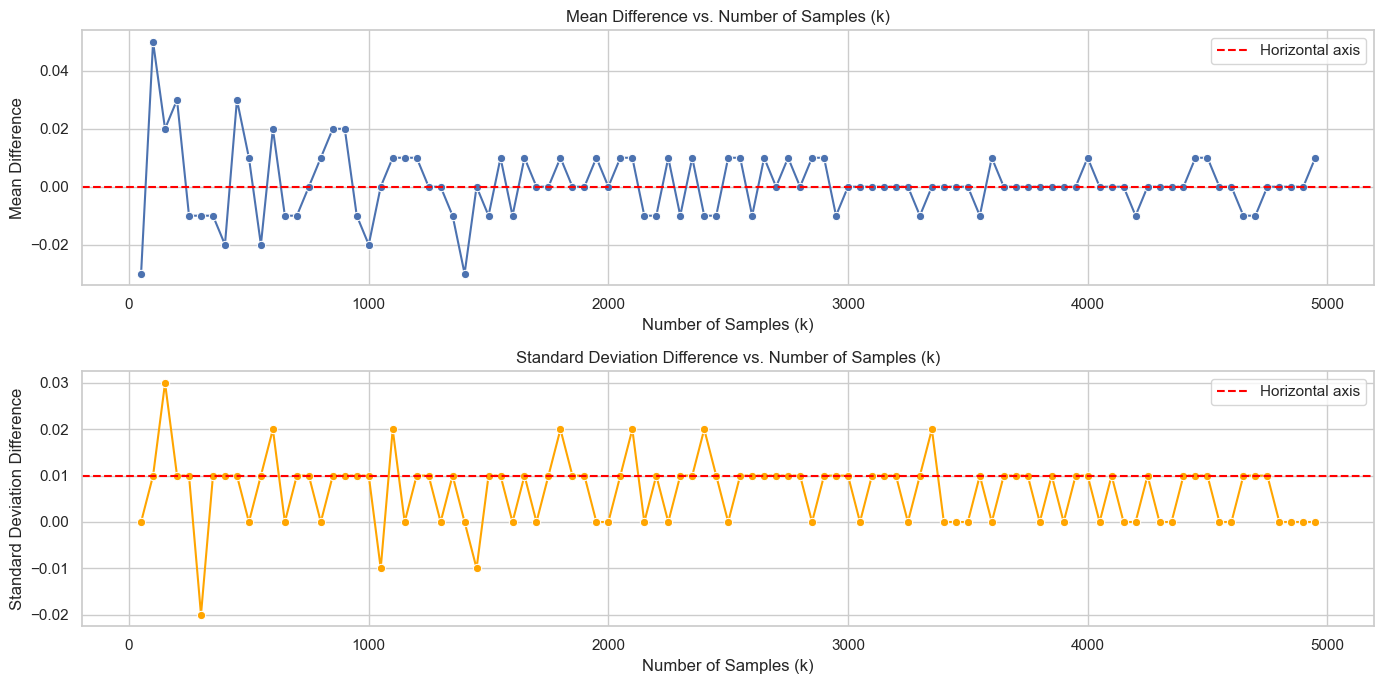

In [8]:
# Set the visual style
sns.set(style="whitegrid")

# Create a figure and axis
plt.figure(figsize=(14, 7))

# Plotting Mean Differences
plt.subplot(2, 1, 1)  # 2 rows, 1 column, 1st subplot
sns.lineplot(data=results_df, x='k', y='mean_difference', marker='o')
plt.title('Mean Difference vs. Number of Samples (k)')
plt.xlabel('Number of Samples (k)')
plt.ylabel('Mean Difference')
plt.axhline(0, color='red', linestyle='--', label='Horizontal axis')
plt.legend()

# Plotting Standard Deviation Differences
plt.subplot(2, 1, 2)  # 2 rows, 1 column, 2nd subplot
sns.lineplot(data=results_df, x='k', y='stddev_difference', marker='o', color='orange')
plt.title('Standard Deviation Difference vs. Number of Samples (k)')
plt.xlabel('Number of Samples (k)')
plt.ylabel('Standard Deviation Difference')
plt.axhline(0.01, color='red', linestyle='--', label='Horizontal axis')
plt.legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()